<a href="https://colab.research.google.com/github/rosembergennes/python/blob/master/SWINGTRADE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Carregando as BIBLIOTECAS 

In [ ]:
!apt update
!apt install chromium-chromedriver
!pip install selenium
!pip install dnspython

import time
from datetime import datetime, timedelta
from selenium import webdriver
import requests
import pandas as pd
from google.colab import files
import os
import numpy as np
from pandas import DataFrame
import pandas as pd
from datetime import timedelta, date ,datetime
from decimal import Decimal
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import datetime
from pymongo import MongoClient
import pprint
import datetime
import json
# Importando numpy
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta, date ,datetime
pd.options.display.max_columns = None
pd.options.display.max_rows = None


Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Hit:4 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:12 http://security.ubuntu.com/ubuntu bionic-s

## OBTENDO DADOS DO ATLAS MONGODB

In [ ]:
# obtendo dados do atlas mongodb
client = MongoClient("mongodb+srv://")
db = client.acoes
collection = db.TCCBIGDATA
data = pd.DataFrame(list(collection.find()))


In [ ]:
# limpeza dos dados em Branco 
data = data.dropna(subset=['SETOR'])
data = data.loc[(data['SETOR'] != "")]

## FILTRANDO DATAFRAME POR DATA

In [ ]:
data.tail(1)

,_id,DATPRG,CODBDI,CODNEG,NOMRES,ESPECI,PREABE,PREMAX,PREMIN,PREULT,PREOFC,PREOFV,VOLTOT,VALAF,VALMM,PERCAF,PERCMM,EMPRESA,SETOR,SUBSETOR,VALMERC,VALFIRMA,NUACOES,PL,CRESULT5,VPA,GIROATIVO
12033,5f6d6b4c2a37d5afcdb2497b,2020-09-24,8,VIVR3,VIVER,ON NM,1.14,1.19,1.11,1.18,1.17,1.18,1288939.0,0.04,0.08,3.51,6.72,VIVER ON NM,Construção e Engenharia,Construção Civil,112298000.0,303825000.0,95168000.0,-0.69,-49.7,-1.62,-0.14


In [ ]:
# Filtrando dataframe por data 

# verificando ultima data do dataframe data
# data.tail() exemplo ultima data ==> 2020-09-11	

# Apenas no caso da coluna não ser do tipo datetime
# df['Data'] = pd.to_datetime(df['Data'])

# Criando o filtro de data
filtro_data = (data['DATPRG'] >= '2020-08-05') & (data['DATPRG'] <= '2020-09-04')
df_filtrado_data = data[filtro_data]

df_filtrado_data.head()
# df_filtrado.tail() #2020-09-04
# df_filtrado.head() # 2020-08-17 (2020-08-15 = sabado não tem pregao)

,_id,DATPRG,CODBDI,CODNEG,NOMRES,ESPECI,PREABE,PREMAX,PREMIN,PREULT,PREOFC,PREOFV,VOLTOT,VALAF,VALMM,PERCAF,PERCMM,EMPRESA,SETOR,SUBSETOR,VALMERC,VALFIRMA,NUACOES,PL,CRESULT5,VPA,GIROATIVO
0,5f2be5e43427840390ba032a,2020-08-05,2,AALR3,ALLIAR,ON NM,11.07,11.12,10.69,10.72,10.72,10.73,8011134.0,-0.35,0.43,-3.16,3.87,ALLIAR ON NM,Saúde,"Serviços Médico - Hospitalares, Análises e Dia...",1.268100e+09,1.835620e+09,118293000.0,130.28,0.9,10.68,0.40
1,5f2be5e43427840390ba0336,2020-08-05,2,ALUP11,ALUPAR,UNT N2,24.10,24.23,23.94,24.19,24.19,24.20,25051431.0,0.09,0.29,0.37,1.20,ALUPAR UNT N2,Energia Elétrica,Energia Elétrica,7.088560e+09,1.230160e+10,879111000.0,10.60,32.5,17.77,0.23
2,5f2be5e43427840390ba0332,2020-08-05,2,ALPK3,ESTAPAR,ON NM,9.65,9.65,9.40,9.42,9.41,9.56,475608.0,-0.23,0.25,-2.38,2.59,ESTAPAR ON NM,Serviços,Serviços Diversos,1.825320e+09,3.322910e+09,193771000.0,0.00,0.0,2.82,0.00
3,5f2be5e43427840390ba033f,2020-08-05,2,AZEV4,AZEVEDO,PN,4.05,4.30,4.00,4.20,4.20,4.25,66449.0,0.15,0.30,3.70,6.98,AZEVEDO & TRAVASSOS PN,Construção e Engenharia,Construção Pesada,2.268000e+07,5.668700e+07,5400000.0,0.30,-49.4,-46.10,-0.82
4,5f2be5e43427840390ba0349,2020-08-05,2,BBRK3,BR BROKERS,ON NM,2.25,2.30,2.17,2.30,2.30,2.31,1168166.0,0.05,0.13,2.22,5.65,BR Brokers ON NM,Construção e Engenharia,Intermediação Imobiliária,8.344010e+07,3.510010e+07,36278300.0,-0.55,2.2,4.59,0.38


## ANALISANDO MELHORES EMPRESAS PARA INVESTIMENTO 

In [ ]:
# OBS TECNICAS I :
# Qualquer coisa que não seja uma string não pode ter métodos de string aplicados, 
# então o resultado é NaN (naturalmente).
# Só colocamos na=False para esclarecer pois já realizamos esta limpeza em processos anteriores.
# https://www.euqueroinvestir.com/qual-a-diferenca-de-acoes-preferenciais-e-ordinarias-e-qual-a-melhor-opcao/
df_pn =df_filtrado_data[df_filtrado_data['ESPECI'].str.contains("", na=False )]

In [ ]:
# OBS TECNICAS II :
# Caso obtenham a mensagem FutureWarning: Indexing with multiple keys
# (implicitly converted to a tuple of keys) will be deprecated, 
# use a list instead. if __name__ == '__main__':
# Obs : Este aviso foi introduzido no pandas 1.0.0, após uma discussão no GitHub 
# https://github.com/pandas-dev/pandas/issues/23566
# A solução então :
# Parênteses simples são usados ​​para gerar uma série Pandas e 
# Colchetes duplos são usados ​​para gerar um DataFrame Pandas.
# Para não termos problema com o indice ==> .reset_index()


In [ ]:
# OBS TECNICAS III :
# Como o indice ficou muito zuado e eu não tava afim de receber 
# SettingWithCopyWarning: A value is trying to be set on a copy of a slice  from
# a DataFrame é que você está tentando fazer uma operação chamada chained indexing, 
# Adotamos refazer o indice
# df_pos_cres = df_empresas_saudaves.reset_index(drop=True) 


In [ ]:
# OBSERVAÇÃO METODO ESCOLHIDO.
# Após analisar resultados e compara-los com os graficos, observou-se que a utilização da MEDIANA
# representa a melhor tomada de decisão.   
# o Periodo disponivel refere-se a 1 mes com tudo a mesma tecnica podera 
# ser aplicada a periodo de ate 3 meses.
# contemplado o perfil de investidor de swingtrade de 1 até 3 meses.

# Funcoes Matematicas.
# Soma dos valores de um DataFrame >> df.sum()
# Menor valor de um DataFrame >> df.min()
# Maior valor >> df.max()
# Média dos valores   >> df.mean()
# Mediana dos valores >> df.median()



In [ ]:
# Para obtermos as empresas mais seguras dentro do dataframe das empresas saudaves devemos : 
# 1.) Obtemos a meidana << [['PREULT','VPA','GIROATIVO']].median() >>>
#     PREULT ( ultimo preco de fechamento ),  diminuir de
#     VPA    ( Valor Patrimonial por Ação: Valor do Patrimônio Líquido dividido pelo número total de ações.) 
#
# 2.) Calcular o possivel crescimento ( POS_CRESC ),  levando-se em consideração a mediana:
#     POS_CRESC = PREULT-VPA
#
# 3.) Uma vez obtido o POS_CRESC devemos ordernar do menor para o maior 
# 4.) Isto feito selecionamos os 10 mais e enviamos para o grafico.
#
#                       <<< OBSERVAÇÃO >>>
#
# O mecanismo utilizado (POS_CRESC = PREULT-VPA), talvez não represente as ações de maior rentabilidade
# contudo indica as ações menos volates.
# Ou seja maiores chances de ganho com menor risco de perda.

# 1.)
df_pn=df_pn.groupby(['CODNEG','NOMRES','SETOR'])[['PREULT','VPA','GIROATIVO']].median().reset_index()
df_empresas_saudaves=df_pn.query('GIROATIVO >0 & VPA >0 & VPA <PREULT')
df_empresas_saudaves.head()
df_pos_cres = df_empresas_saudaves.reset_index(drop=True) 
# df_pos_cres.head()

# 2.)
df_pos_cres['POS_CRESC']=df_pos_cres['PREULT']-df_pos_cres['VPA']
# df_pos_cres.head()

# 3.) 
df_pos_cres_ordenado= df_pos_cres.sort_values("POS_CRESC",ascending=True)
# df_pos_cres_ordenado.head()

# 4.)
df_pos_cres_ordenado_top10=df_pos_cres_ordenado.head(10).reset_index(drop=True)
df_pos_cres_ordenado_top10['NOMRES_CODNEG']=df_pos_cres_ordenado_top10.apply(lambda x:'%s (%s %s)' % (x['NOMRES'],x['CODNEG'],x['SETOR']),axis=1)
df_pos_cres_ordenado_top10["PREULT"]=round(df_pos_cres_ordenado_top10["PREULT"],2)
df_pos_cres_ordenado_top10["VPA"]=round(df_pos_cres_ordenado_top10["VPA"],2)
df_pos_cres_ordenado_top10["GIROATIVO"]=round(df_pos_cres_ordenado_top10["GIROATIVO"],2)
df_pos_cres_ordenado_top10["POS_CRESC"]=round(df_pos_cres_ordenado_top10["POS_CRESC"],2)
df_pos_cres_ordenado_top10.head(15)

,CODNEG,NOMRES,SETOR,PREULT,VPA,GIROATIVO,POS_CRESC,NOMRES_CODNEG
0,POMO3,MARCOPOLO,Material de Transporte,2.68,2.61,0.69,0.08,MARCOPOLO (POMO3 Material de Transporte)
1,CRPG5,CRISTAL,Químicos,20.95,20.86,0.61,0.09,CRISTAL (CRPG5 Químicos)
2,BRGE5,ALFA CONSORC,Financeiros,16.54,16.44,0.01,0.09,ALFA CONSORC (BRGE5 Financeiros)
3,POMO4,MARCOPOLO,Material de Transporte,2.83,2.61,0.69,0.22,MARCOPOLO (POMO4 Material de Transporte)
4,OIBR3,OI,Telefonia Fixa,1.62,1.36,0.26,0.26,OI (OIBR3 Telefonia Fixa)
5,CTSA3,SANTANENSE,"Tecidos, Vestuário e Calçados",2.90,2.62,0.73,0.27,"SANTANENSE (CTSA3 Tecidos, Vestuário e Calçados)"
6,CRPG6,CRISTAL,Químicos,21.20,20.86,0.61,0.34,CRISTAL (CRPG6 Químicos)
7,AALR3,ALLIAR,Saúde,11.26,10.68,0.40,0.58,ALLIAR (AALR3 Saúde)
8,TUPY3,TUPY,Material de Transporte,17.13,16.44,0.70,0.69,TUPY (TUPY3 Material de Transporte)
9,ENAT3,ENAUTA PART,"Petróleo, Gás e Biocombustíveis",11.68,10.95,0.27,0.73,"ENAUTA PART (ENAT3 Petróleo, Gás e Biocombustí..."


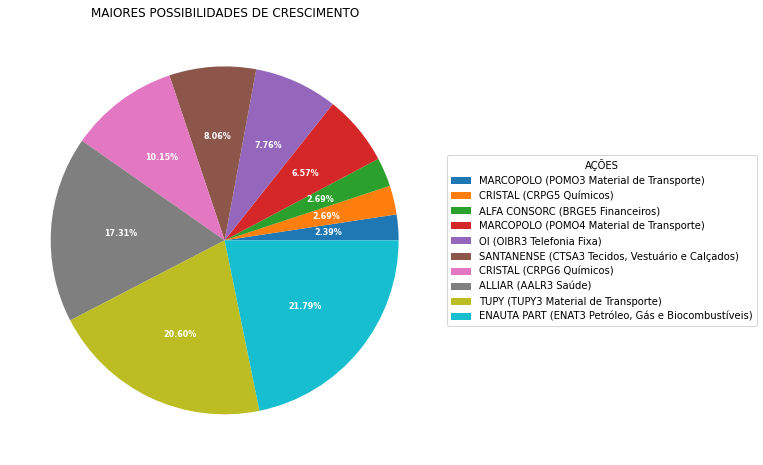

In [ ]:
# Area de plotagem do Grafico definindo o tamanho figsize=(8,8)
fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(aspect="equal"))

# Matriz dos dados (valores,titulos)
valores =  df_pos_cres_ordenado_top10["POS_CRESC"].head(10)
titulos =  df_pos_cres_ordenado_top10["NOMRES_CODNEG"].head(10)

# Calculo para porcentagem dentro do grafico
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.2f}%".format(pct, absolute)

# Criando o grafico e acertando as legendas
wedges, texts, autotexts = ax.pie(valores, autopct=lambda pct: func(pct, valores),
                                  textprops=dict(color="w"))

ax.legend(wedges, titulos,
          title="AÇÕES",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("MAIORES POSSIBILIDADES DE CRESCIMENTO")

plt.show()